# DATA SCIENCE III - CODERHOUSE
PROYECTO FINAL

M.E.

# News Classification

We will conduct an analysis to classify economic news in Spanish taken from mass media.

## Instalations, libraries and repositories

In [ ]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 7.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
import re
import pickle

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
nlp = spacy.load("es_core_news_md")

In [ ]:
from spacy.lang.es import stop_words as stop_words

In [ ]:
stop_words = stop_words.STOP_WORDS

### GitHub

In [ ]:
# Clone the GitHub repository
!git clone https://github.com/ME-2023/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 1.35 MiB | 5.54 MiB/s, done.


In [ ]:
# Change directory to the cloned repository
%cd datasets

/content/datasets


In [ ]:
# List the files in the repository to confirm the PDF is there
!ls

df_economy_news.csv  README.md


## EDA

In [ ]:
# Open csv file
df = pd.read_csv('df_economy_news.csv')

In [ ]:
df

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion


### Stats

In [ ]:
df.describe()

,url,news,Type
count,1217,1217,1217
unique,1101,1138,7
top,https://www.bbva.com/es/bbva-invierte-en-el-fo...,,Macroeconomia
freq,5,4,340


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1217 non-null   object
 1   news    1217 non-null   object
 2   Type    1217 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB


### Unique categories

In [ ]:
# Count and print unique categories in series "Type"
unique_categories = df['Type'].unique()
print(unique_categories)

['Otra' 'Regulaciones' 'Alianzas' 'Macroeconomia' 'Innovacion'
 'Sostenibilidad' 'Reputacion']


In [ ]:
# Count and print the number of each category in the "Type" series
category_counts = df['Type'].value_counts()
category_counts

,count
Type,
Macroeconomia,340
Alianzas,247
Innovacion,195
Regulaciones,142
Sostenibilidad,137
Otra,130
Reputacion,26


### Distribution of the number of words per review

Text(0, 0.5, 'News frequency')

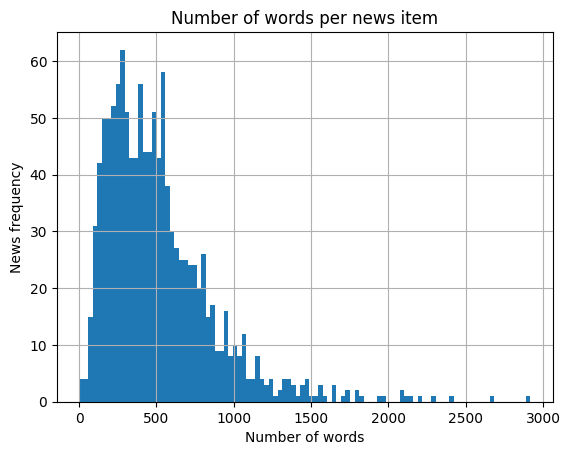

In [ ]:
words_per_news = df.news.apply(lambda x: len(x.split(" ")))
words_per_news.hist(bins = 100)
plt.title('Number of words per news item')
plt.xlabel('Number of words')
plt.ylabel('News frequency')

The distribution is asymetric.

In [ ]:
words_per_news.mean()

514.2456861133936

In [ ]:
percent_val = 100 * df.Type.value_counts()/df.shape[0]
percent_val

,count
Type,
Macroeconomia,27.937551
Alianzas,20.295809
Innovacion,16.023007
Regulaciones,11.668036
Sostenibilidad,11.257190
Otra,10.682005
Reputacion,2.136401


Text(0, 0.5, 'Percentage (%)')

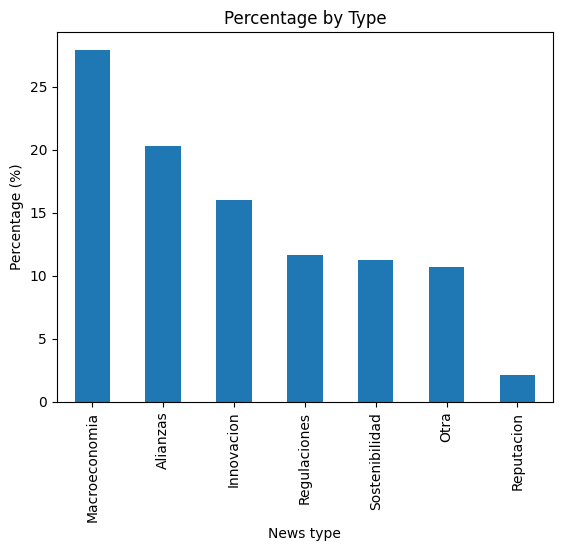

In [ ]:
percent_val.plot.bar()
plt.title('Percentage by Type')
plt.xlabel('News type')
plt.ylabel('Percentage (%)')

## Data Wrangling

In [ ]:
# Drop series "url"
df = df.drop(columns=['url'])

In [ ]:
# Create a new series called "target" that stores 1 if the value of Series "Type" is "Macroeconomia", else 0
df['target'] = df['Type'].apply(lambda x: 1 if x == 'Macroeconomia' else 0)

In [ ]:
df.head(10)

,news,Type,target
0,Durante el foro La banca articulador empresari...,Otra,0
1,El regulador de valores de China dijo el domin...,Regulaciones,0
2,En una industria históricamente masculina como...,Alianzas,0
3,Con el dato de marzo el IPC interanual encaden...,Macroeconomia,1
4,Ayer en Cartagena se dio inicio a la versión n...,Otra,0
5,El emprendimiento del sector inmobiliario Rent...,Alianzas,0
6,El país tiene pendiente generar más y mejores ...,Macroeconomia,1
7,En el 'podcast' tenemos el placer de entrevist...,Innovacion,0
8,"El factor humano, normalmente identificado com...",Innovacion,0
9,Los perfiles que se demandan en un banco han e...,Innovacion,0


In [ ]:
# Print 10 random rows
df.sample(10)

,news,Type,target
468,En un intento por aumentar el acceso al financ...,Sostenibilidad,0
508,Carlos Serrano Herrera economista jefe de BBVA...,Macroeconomia,1
203,El Departamento de Justicia presentará una pro...,Regulaciones,0
1203,En 2021 Bbva en Colombia financió iniciativas ...,Otra,0
1171,"Bolsas, cápsulas, acolchados agrícolas o embal...",Sostenibilidad,0
7,En el 'podcast' tenemos el placer de entrevist...,Innovacion,0
1151,Dos de los principales lunares que en la actua...,Alianzas,0
17,Los precios al consumidor subieron 238 en agos...,Macroeconomia,1
826,Cada vez son más las organizaciones e instituc...,Sostenibilidad,0
920,La vicepresidente y canciller Marta Lucía Ramí...,Alianzas,0


### Drop stopwords

In [ ]:
# Drop stopwords from df
df['news'] = df['news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

### Lemmatization

In the present analysis we decided to use lemmatization and not stemming because we consider that it is more appropriate to use the root form of the word.

In [ ]:
# Lemmantize df['news']
df['news'] = df['news'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))

In [ ]:
df.head(10)

,news,Type,target
0,durante foro el banca articulador empresarial ...,Otra,0
1,el regulador valor China domingo buscar cooper...,Regulaciones,0
2,en industria históricamente masculino aviación...,Alianzas,0
3,con dato marzo IPC interanual encadenar decimo...,Macroeconomia,1
4,ayer cartagena inicio versión número 56 Conven...,Otra,0
5,el emprendimiento sector inmobiliario Rentatop...,Alianzas,0
6,el país pendiente generar mejor acción contrar...,Macroeconomia,1
7,en ' podcast ' placer entrevistar Nacho Escoba...,Innovacion,0
8,"el factor humano , normalmente identificado fa...",Innovacion,0
9,"el perfil demandar banco evolucionado , gestió...",Innovacion,0


### Words frequency

In [ ]:
# Delete punctuation symbols
df['news'] = df['news'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
# Delete articles and word "en"
df['news'] = df['news'].apply(lambda x: " ".join([word for word in x.split() if word not in [
    'el', 'él', 'la', 'los', 'las', 'en','este',
    ]]))

In [ ]:
# Print 10 most frequency words
df['news'].str.split(expand=True).stack().value_counts()[:10]

,count
año,2218
BBVA,2127
empresa,1397
país,1394
inflación,1390
millón,1198
precio,1154
mercado,1000
servicio,973
financiero,970


### Wordcloud

In [ ]:
# Generate wordcloud of "macroeconomia" type
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(" ".join(df[df['target'] == 1]['news']))

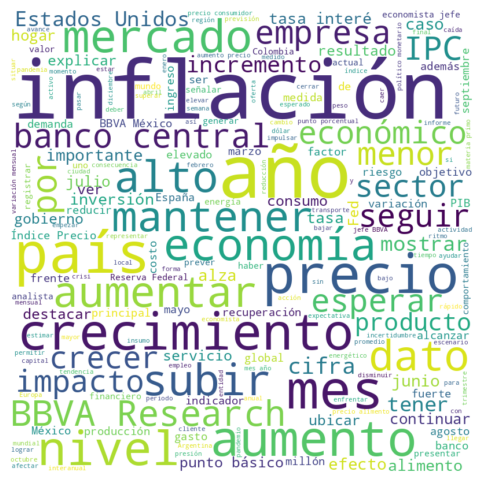

In [ ]:
# Visualize wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Models (Logistic Regression)

### Vectorization

In [ ]:
# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer()

# Fit the model and transform the data
count_matrix = count_vectorizer.fit_transform(df.news)

In [ ]:
count_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 210410 stored elements and shape (1217, 22581)>

In [ ]:
# Convert the count matrix to a DataFrame for better readability
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

In [ ]:
count_df.shape

(1217, 22581)

In [ ]:
# Initialize the Count Vectorizer
# count_vectorizer = CountVectorizer(stop_words=stop_words)
count_vectorizer = CountVectorizer(stop_words=list(stop_words)) # Convert stop_words to a list


# Fit the model and transform the data
count_matrix = count_vectorizer.fit_transform(df.news)

# Convert the count matrix to a DataFrame for better readability
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the DataFrame
count_df

,00,000,0001,001,002,003,003en,003la,003por,003se,...,óscar,ósmosis,óxido,öztopçu,últimamente,única,únicamente,único,úrsula,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=count_matrix.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=df.target
y

,target
0,0
1,0
2,0
3,1
4,0
...,...
1212,0
1213,1
1214,0
1215,0


### LogisticRegression

In [ ]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [ ]:
clf

LogisticRegression()

In [ ]:
news_text="""
Los Estados partes del Mercosur se comprometieron a lograr una mayor "convergencia macroeconómica",
tras la celebración de la LXIV Cumbre de Presidentes del Mercosur en Asunción (Paraguay), en una
búsqueda por fortalecer la estabilidad financiera, monetaria y de precios de los distintos países,
con el fin de profundizar la integración regional.
Este lunes, en un comunicado conjunto, el presidente de la República, Luis Lacalle Pou, y los demás
mandatarios del bloque económico sudamericano reafirmaron su intención de "coordinar políticas
macroeconómicas" con el fin de fomentar el comercio intrazona y que permitan la cooperación de las
economías locales frente a fenómenos climáticos extremos.
"""

In [ ]:
# Assuming 'count_vectorizer' is the same CountVectorizer used for training:
news_text_vectorized = count_vectorizer.transform([news_text])

In [ ]:
# Now, make the prediction:
prediction = clf.predict(news_text_vectorized)
print(prediction)

[0]


In [ ]:
# Print row 3 from df
df.iloc[3]

,3
news,con dato marzo IPC interanual encadenar decimo...
Type,Macroeconomia
target,1


In [ ]:
# Assing to news_text_2 df.news index 3
news_text_2 = df.news[3]

In [ ]:
news_text_vectorized_2 = count_vectorizer.transform([news_text_2])

In [ ]:
# Now, make the prediction:
prediction = clf.predict(news_text_vectorized_2)
print(prediction)

[1]


The model works but we have not yet separated training from testing.

#### Training and Test sets

In [ ]:
X=df.news
y=df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Fit the model and transform the data
X_train_v = count_vectorizer.fit_transform(X_train)

clf = LogisticRegression()
clf.fit(X_train_v, y_train)

LogisticRegression()

In [ ]:
X_train_v.shape

(912, 19223)

In [ ]:
X_test_v=count_vectorizer.transform(X_test)

In [ ]:
y_pred=clf.predict(X_test_v)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9770


In [ ]:
# download model
with open('model_logistic_regression.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
# upload model
with open('model_logistic_regression.pkl', 'rb') as file:
    model = pickle.load(file)

### TF-IDF

In [ ]:
# Initialize the TF-IDF Vectorizer
# vectorizer = TfidfVectorizer(stop_words='english')
vectorizer = TfidfVectorizer(stop_words=list(stop_words))

# Transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
clf2 = LogisticRegression()
clf2.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
X_train_tfidf.shape

(912, 19223)

In [ ]:
# Make predictions
y_pred2 = clf2.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9607
